In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all libray 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [3]:
# Importing Data sets
House= pd.read_csv('Bengaluru_House_Data.csv')
House.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


## EDA

In [4]:
House.shape

(13320, 9)

In [5]:
# NUll values checking
House.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
# House dataset information
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
House.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
for i in House.columns:
    unique_values=House[i].unique()
    print(f"Unique values in column '{i}':",unique_values)
    print()

Unique values in column 'area_type': ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']

Unique values in column 'availability': ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']

Unique values in column 'location': ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttar

In [9]:
for i in House.columns:
    value_counts=House[i].value_counts()
    print(f"values counts in column '{i}':\n{value_counts}")
    print()

values counts in column 'area_type':
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

values counts in column 'availability':
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

values counts in column 'location':
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Na

In [10]:
# locaction columns null values checking

House[House['location'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [11]:
# location columns null values fillining 

House['location'].fillna('Whitefield' , inplace = True) 

In [12]:
# size columns null values checking

House[House['size'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [13]:
# size columns null values filling 
House['size'].fillna('2 BHK', inplace =True) 

In [14]:
House.isna().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
# size column convert to rooms columns
House['rooms'] = House['size'].apply(lambda x: x.split(" ")[0])
House.rooms = House.rooms.astype('int')
House.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [16]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   rooms         13320 non-null  int32  
dtypes: float64(3), int32(1), object(6)
memory usage: 988.7+ KB


In [17]:
for i in House.total_sqft:
    print(i)

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
1100
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
600
660
1330.74
600
970
1459
800
869
1270
1670
2010
1185
1600
1200
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1100
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
3000
1665
708
1060
710
1000
1000
1450
1200
1296
1540
2894
1330
1200
1200
2502
650
2400
1007
1200
966
1630
1640
782
1260
1800
1413
1116
1530
3700
2497
1540
1436
1100
276
1427
2061
3067 - 8156
2650
1282
1050
1600
945
1500
950
1870
1600
880
1200
1535
950
1360
1042 - 1105
1280
1260
5000
3050
1563.05
1000
1167
4000
1828
890
1612
1034
1710
957
1250
2795
1125
1020
1200
1735
2050
3750
1350
1063
1904
4200
2000
1145 - 1340
1425
1500
1060
1470
1300
450
1152
1350
1550
1500
600
400
705
770
1242
1700
2144
1704
1070
1846
1340
1025
1015 - 1540
1200
2250
1550
1200
1800
1200
1

In [18]:
updated_total_sqft = []

for i in House['total_sqft']:
    if "-" in i:
        try:
            lower, upper = map(float, i.split("-"))
            avg = (lower+upper)/2
            updated_total_sqft.append(avg)
        except ValueError:
            updated_total_sqft.append(i)
    else:
        try:
            updated_total_sqft.append(float(i))
        except ValueError:
            updated_total_sqft.append(i)
            
House['total_sqft']=updated_total_sqft
print(House)

                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  rooms  
0          2 BHK  Coomee      1056.0   2.0      1.0   39.07      2

In [19]:
total = []
for i in House['total_sqft']:
    if isinstance(i, str):
        total.append(i)
        total = []
for i in House['total_sqft']:
    if isinstance(i, str):
        total.append(i)
        
print(len(total))

46


In [20]:
House['total_sqft'] = pd.to_numeric(House['total_sqft'], errors='coerce')
House.dropna(subset=['total_sqft'], inplace=True)


In [21]:
House.shape

(13274, 10)

In [22]:
for location in House['location']:
    if any(char.isdigit() for char in str(location)):
        print(location)

7th Phase JP Nagar
Electronics City Phase 1
8th Phase JP Nagar
8th block Koramangala
1st Block Jayanagar
Electronics City Phase 1
Lakshminarayanapura, Electronic City Phase 2
7th Phase JP Nagar
7th Phase JP Nagar
7th Phase JP Nagar
Electronics City Phase 1
9th Phase JP Nagar
RMV 2nd Stage
6th Phase JP Nagar
7th Phase JP Nagar
Banashankari3rd stage bigbazar
5th Phase JP Nagar
8th Phase JP Nagar
7th Phase JP Nagar
Electronics City Phase 1
7th Phase JP Nagar
7th Phase JP Nagar
7th Phase JP Nagar
1 Giri Nagar
2nd Stage Nagarbhavi
RMV 2nd Stage
3rd Block Hrbr Layout
7th Phase JP Nagar
5th Phase JP Nagar
8th Phase JP Nagar
Sector 7 HSR Layout
7th Block Jayanagar
2nd Phase JP Nagar
3rd Block Hrbr Layout
7th Phase JP Nagar
Electronics City Phase 1
Sector 6 HSR Layout
6th block banashankari 3rd stage, 100 feet ORR
6th Phase JP Nagar
7th Phase JP Nagar
Narayana Nagar 1st Block
5th Phase JP Nagar
Sector 3 HSR Layout
7th Phase JP Nagar
4 Bedroom Farm House in Bagalur
7th Phase JP Nagar
7th Phase J

In [23]:
# Add 'other' label for locations with frequency less than 11

location_counts = House['location'].value_counts()
single_frequency_locations = location_counts[location_counts <= 10].index
House.loc[House['location'].isin(single_frequency_locations), 'location'] = 'Other'
House.location.value_counts()

location
Other                        2891
Whitefield                    539
Sarjapur  Road                399
Electronic City               302
Kanakpura Road                271
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: count, Length: 241, dtype: int64

In [24]:
# total_sqft columns additional per_sft_price columns add

House['per_sqft_price']=House['price']*100000/House['total_sqft']

In [25]:
House.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rooms,per_sqft_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2,4250.000000


## Visuazalition

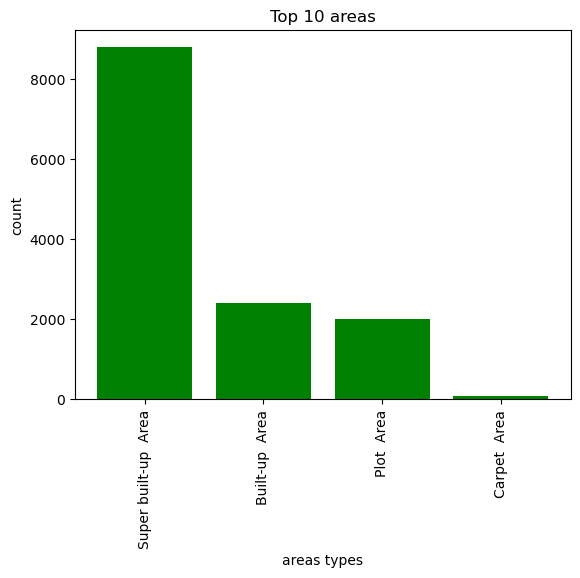

In [26]:
# location bar plot
area_type=House['area_type']
area_types_count=area_type.value_counts()
plt.bar(area_types_count.index,area_types_count.values,color='green')
plt.xlabel('areas types')
plt.ylabel('count')
plt.title('Top 10 areas')
plt.xticks(rotation=90)
plt.show()

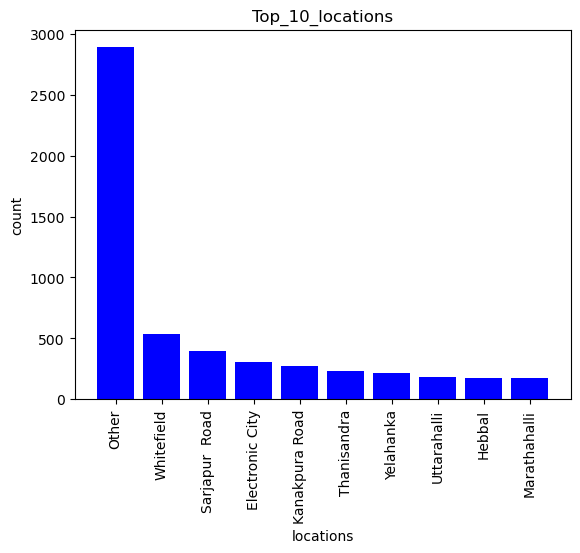

In [27]:
locations=House['location']
location_count=locations.value_counts()
top_10_locations=location_count.head(10)
plt.bar(top_10_locations.index,top_10_locations.values,color='blue')
plt.xlabel('locations')
plt.ylabel('count')
plt.title('Top_10_locations')
plt.xticks(rotation=90)
plt.show()

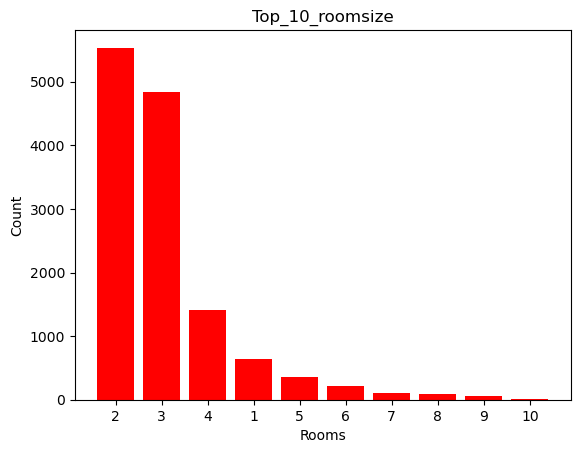

In [28]:
rooms=House['rooms'].astype(str)
room_count=rooms.value_counts()
top_10_rooms=room_count.head(10)

plt.bar(top_10_rooms.index,top_10_rooms.values,color='red')
plt.xlabel('Rooms')
plt.ylabel('Count')
plt.title('Top_10_roomsize')
plt.show()

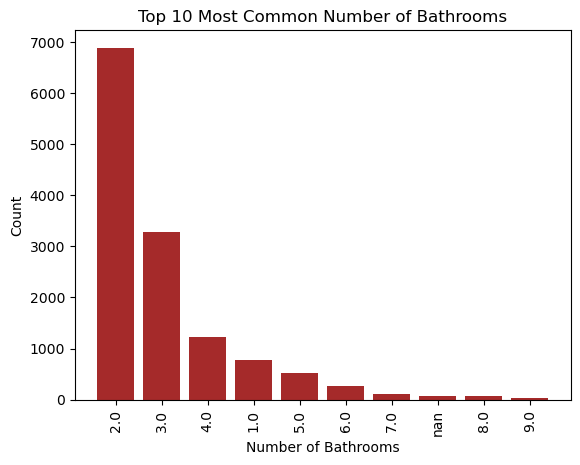

In [29]:
bath = House['bath'].astype(str)


baths_count = bath.value_counts().head(10)


plt.bar(baths_count.index, baths_count.values, color='brown')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Top 10 Most Common Number of Bathrooms')
plt.xticks(rotation=90)  
plt.show()

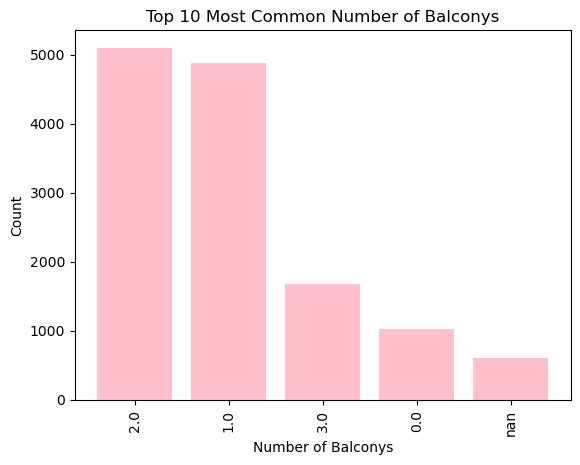

In [30]:
balcony = House['balcony'].astype(str)

# Get the count of each value in the 'bath' column
balcony_count = balcony.value_counts().head(10)

# Create a bar plot
plt.bar(balcony_count.index, balcony_count.values, color='pink')
plt.xlabel('Number of Balconys')
plt.ylabel('Count')
plt.title('Top 10 Most Common Number of Balconys')
plt.xticks(rotation=90)  
plt.show()

In [31]:
House.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rooms,per_sqft_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2,4250.000000


## Scatter plot created

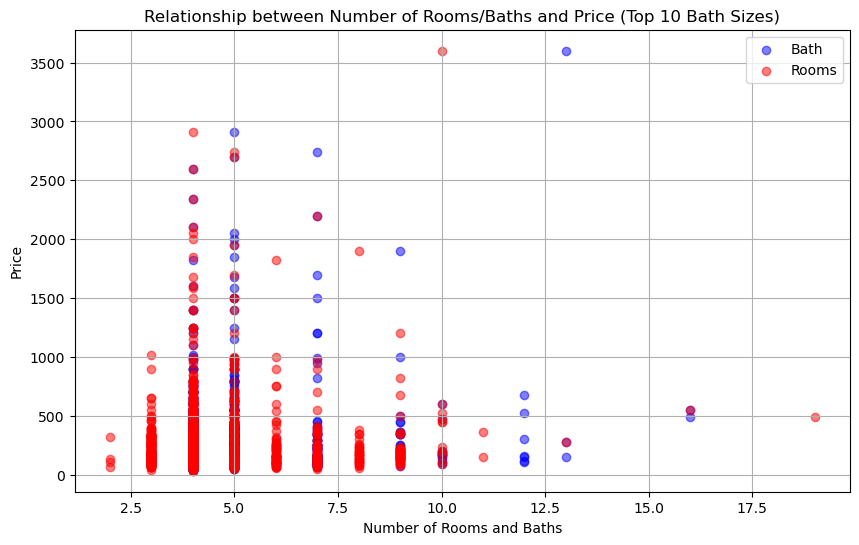

In [32]:
bath_price_avg = House.groupby('rooms')['price'].mean()
top_10_baths = bath_price_avg.nlargest(10)
House_top_10 = House[House['bath'].isin(top_10_baths.index)]

plt.figure(figsize=(10, 6))
plt.scatter(House_top_10['bath'], House_top_10['price'], color='blue', alpha=0.5, label='Bath')
plt.scatter(House_top_10['rooms'], House_top_10['price'], color='red', alpha=0.5, label='Rooms')
plt.xlabel('Number of Rooms and Baths')
plt.ylabel('Price')
plt.title('Relationship between Number of Rooms/Baths and Price (Top 10 Bath Sizes)')
plt.legend()
plt.grid(True)
plt.show()

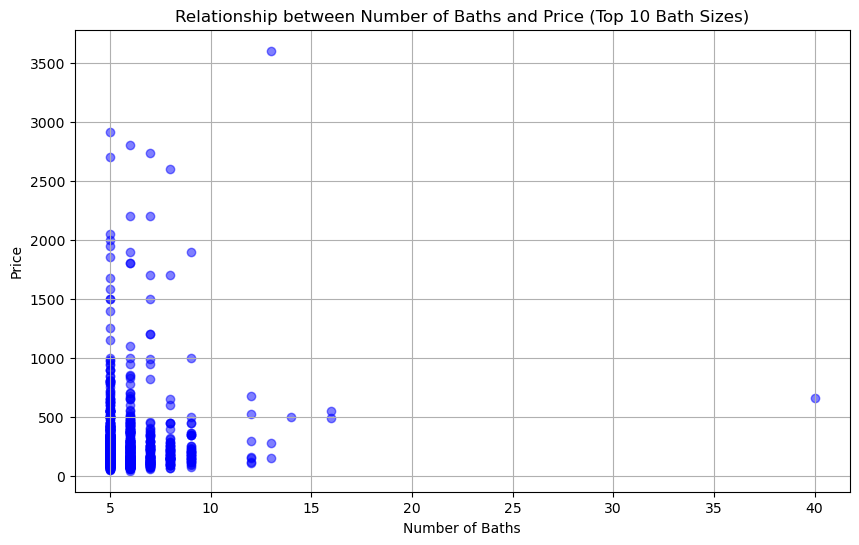

In [33]:
bath_price_avg = House.groupby('bath')['price'].mean()

top_10_baths = bath_price_avg.nlargest(10)

House_top_10 = House[House['bath'].isin(top_10_baths.index)]

plt.figure(figsize=(10, 6))
plt.scatter(House_top_10['bath'], House_top_10['price'], color='blue', alpha=0.5)
plt.xlabel('Number of Baths')
plt.ylabel('Price')
plt.title('Relationship between Number of Baths and Price (Top 10 Bath Sizes)')
plt.grid(True)
plt.show()

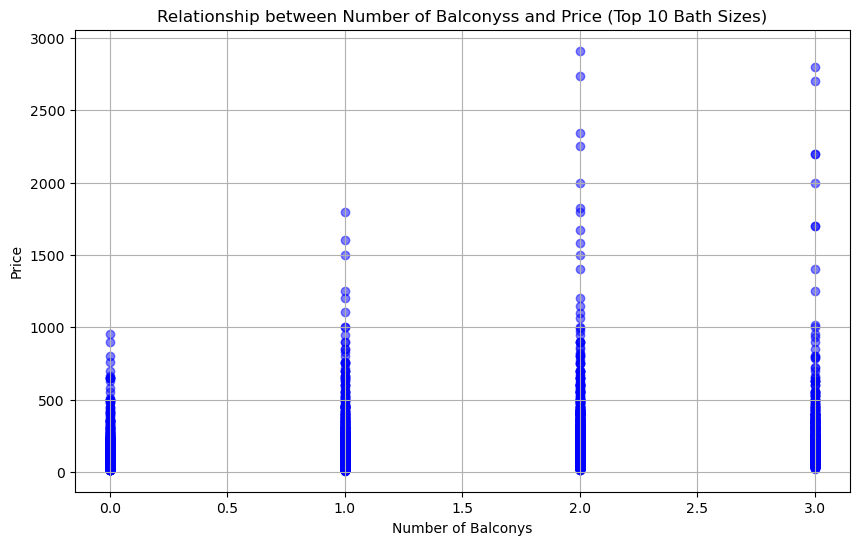

In [34]:
bath_price_avg = House.groupby('balcony')['price'].mean()

top_10_baths = bath_price_avg.nlargest(10)

House_top_10 = House[House['balcony'].isin(top_10_baths.index)]

plt.figure(figsize=(10, 6))
plt.scatter(House_top_10['balcony'], House_top_10['price'], color='blue', alpha=0.5)
plt.xlabel('Number of Balconys')
plt.ylabel('Price')
plt.title('Relationship between Number of Balconyss and Price (Top 10 Bath Sizes)')
plt.grid(True)
plt.show()

In [35]:
House.per_sqft_price.describe()

count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: per_sqft_price, dtype: float64

In [36]:
House_new = House.drop(House[House['total_sqft'] / House['rooms'] < 300].index)

In [37]:
House_new.shape

(12530, 11)

In [38]:
House_new.isna().sum()

area_type            0
availability         0
location             0
size                 0
society           4774
total_sqft           0
bath                73
balcony            516
price                0
rooms                0
per_sqft_price       0
dtype: int64

In [39]:
House_new_1=House_new.drop(['society','size','availability','area_type','per_sqft_price'],axis=1)

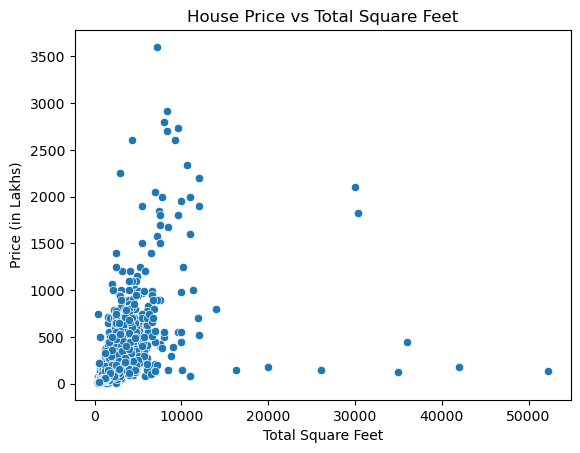

In [40]:
sns.scatterplot(x='total_sqft', y='price', data=House_new_1)
plt.title('House Price vs Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price (in Lakhs)')
plt.show()

## Heatmap

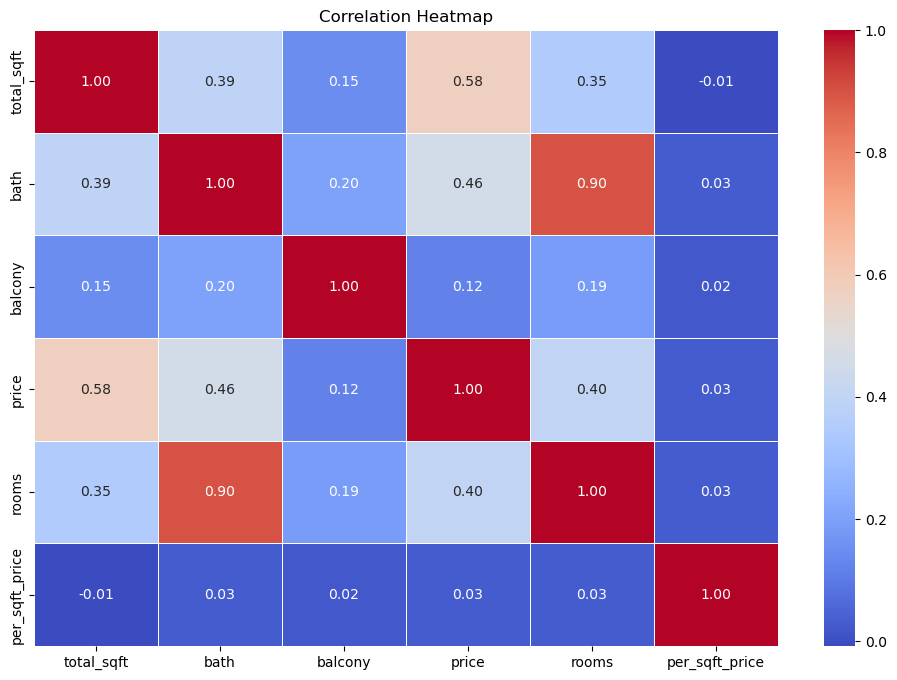

In [41]:
selected_columns = ['total_sqft', 'bath', 'balcony', 'price', 'rooms', 'per_sqft_price']

correlation_matrix = House[selected_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [42]:
House_new_1.head()

,location,total_sqft,bath,balcony,price,rooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [43]:
dummies=pd.get_dummies(House_new_1.location)
dummies.head(10)


,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [44]:
House_new_1.head(10)

,location,total_sqft,bath,balcony,price,rooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,NaN,204.00,4
7,Rajaji Nagar,3300.0,4.0,NaN,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
10,Whitefield,1800.0,2.0,2.0,70.00,3


In [45]:
House_new_2 = pd.concat([House_new_1, dummies.drop('Other',axis=1)], axis='columns')


House_new_2.head(10)

,location,total_sqft,bath,balcony,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,1.0,51.00,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Whitefield,1170.0,2.0,1.0,38.00,2,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,Old Airport Road,2732.0,4.0,NaN,204.00,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Rajaji Nagar,3300.0,4.0,NaN,600.00,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Marathahalli,1310.0,3.0,1.0,63.25,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,Whitefield,1800.0,2.0,2.0,70.00,3,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [46]:
House_new_3=House_new_2.drop('location',axis='columns')
House_new_3

,total_sqft,bath,balcony,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,0.0,231.00,5,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13316,3600.0,5.0,NaN,400.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,1141.0,2.0,1.0,60.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4689.0,4.0,1.0,488.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
House_new_4= House_new_3.dropna(subset=['balcony', 'bath'])
House_new_4.head()

,total_sqft,bath,balcony,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
House_new_4.isna().sum()

total_sqft            0
bath                  0
balcony               0
price                 0
rooms                 0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 245, dtype: int64

### Model Building

In [49]:
x=House_new_4.drop('price',axis='columns')
x.head(10)

,total_sqft,bath,balcony,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8,1310.0,3.0,1.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1800.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11,2785.0,5.0,3.0,4,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
12,1000.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
y=House_new_4.price
y.head(5)

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [51]:
x.head()

,total_sqft,bath,balcony,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,3.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,1.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13314    112.00
13315    231.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 12014, dtype: float64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [54]:
x_test.head()

,total_sqft,bath,balcony,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
11469,1350.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5044,650.0,1.0,1.0,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11030,4000.0,5.0,2.0,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11721,1580.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9812,1056.0,1.0,0.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
x_train.head()

,total_sqft,bath,balcony,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
8221,1435.0,3.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8945,1020.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6894,1025.0,2.0,0.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12863,1510.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11468,1236.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
model_params={
    'linear_regression': {
        'model': LinearRegression(),
    },
    
     'random_forest_regression': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20]
        }
    },
    'decision_tree_regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 20]
        }
    },
    'neural_network': {
        'model': MLPRegressor(),
        'params': {
            'hidden_layer_sizes': [(50,), (20,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        }
    },
    
}

In [57]:
score_regression=[]

for model_name in model_params:
    mp=model_params[model_name]
    gds=GridSearchCV(mp['model'],mp.get('params',{}),cv=5,return_train_score=True)
    gds.fit(x,y)
    score_regression.append({
        'model': model_name,
        'best_score':gds.best_score_,
        'best_params': gds.best_params_
    })
    

for score in score_regression:
    print(f"Model: {score['model']}, Best Score: {score['best_score']}, Best Parameters: {score['best_params']}")

In [58]:
# Final model
model_final =LinearRegression()
model_final.fit(x_train, y_train)

LinearRegression()

In [59]:
y_train

8221      90.00
8945      48.45
6894      42.50
12863     65.00
11468     58.00
          ...  
13262    185.00
5776      55.00
6002      75.00
947       79.50
8117      48.60
Name: price, Length: 8409, dtype: float64

In [60]:
x_test

,total_sqft,bath,balcony,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
11469,1350.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5044,650.0,1.0,1.0,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
11030,4000.0,5.0,2.0,5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11721,1580.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9812,1056.0,1.0,0.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245,1200.0,4.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8699,1394.0,2.0,3.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8042,1070.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5944,1450.0,3.0,3.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
y_train_pred = model_final.predict(x_train)
y_train_pred

array([109.11386714,  47.34236769,  81.97321625, ...,  98.64863247,
        90.48758295,  88.64285697])

In [62]:
training_error=mean_squared_error(y_train,y_train_pred)
training_error

7747.422006250988

In [63]:
y_test_pred = model_final.predict(x_test)
y_test_pred

array([ 65.88419354,   9.99371829, 306.27803215, ...,  49.07320445,
        94.97135404,  70.16486045])

In [64]:
testing_error = mean_squared_error(y_test,y_test_pred)
testing_error

14744.961306549823

In [65]:
def predict_price(location,sqft,bath,balcony,rooms):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = balcony
    X[3] = rooms
    if loc_index >= 0:
        X[loc_index] = 1

    return model_final.predict([X])[0]

In [66]:
House.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,rooms,per_sqft_price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.0,5,6689.834926
13316,Super built-up Area,Ready To Move,Other,4 BHK,NaN,3600.0,5.0,NaN,400.0,4,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.0,2,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.0,4,10407.336319
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550.0,1.0,1.0,17.0,1,3090.909091


In [67]:
predict_price('Electronic City Phase II',1056,2,1,2)

35.11596955979604

In [68]:
predict_price('Lingadheeranahalli',1521,3,1,3)

101.26072135145866

In [69]:
predict_price('Kothanur',1200,2,1,2)

48.78406668236319

In [70]:
predict_price('Padmanabhanagar',4689,4,1,4)

356.16727384592195

In [71]:
predict_price("Raja Rajeshwari Nagar",1141,2,1,2)

39.864728265748454

In [72]:
predict_price("Whitefield",3453,4,0,5)

272.9202201110949

### Deployment

In [73]:
from pickle import dump

In [74]:
dump(model_final,open('model_final.sav',"wb"))
dump(x,open('data.sav','wb'))